In [29]:
import numpy as np 
import numpy.random as random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy.linalg as linalg
from sklearn.decomposition import TruncatedSVD
plt.style.use('seaborn-whitegrid')

In [30]:
norm = random.multivariate_normal(mean=[0,0],cov=[[1,0.95],[0.95,1]],size=100).T
norm.shape


(2, 100)

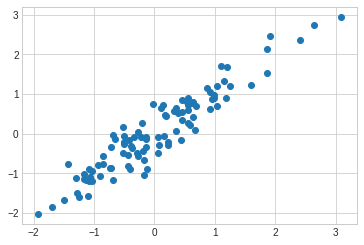

In [31]:
plt.scatter(norm[0,:],norm[1,:])

In [43]:
df = pd.read_csv('data/clean_data.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,7120,7121,7122,7123,7124,7125,7126,7127,7128,class
0,-214,-153,-58,88,-295,-558,199,-176,252,206,...,511,-125,389,-37,793,329,36,191,-37,0
1,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,837,-36,442,-17,782,295,11,76,-14,0
2,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,1199,33,168,52,1138,777,41,228,-41,0
3,-135,-114,265,12,-419,-585,158,-253,49,31,...,835,218,174,-110,627,170,-50,126,-91,0
4,-106,-125,-76,168,-230,-284,4,-122,70,252,...,649,57,504,-26,250,314,14,56,-25,0


In [70]:
X = df.drop('class',axis=1)

In [71]:
X = X - X.mean() 

In [72]:
u,s,v_t=linalg.svd(X)
diag_s = np.zeros((X.shape[0], X.shape[1]))
diag_s[:X.shape[0], :X.shape[0]] = np.diag(s)


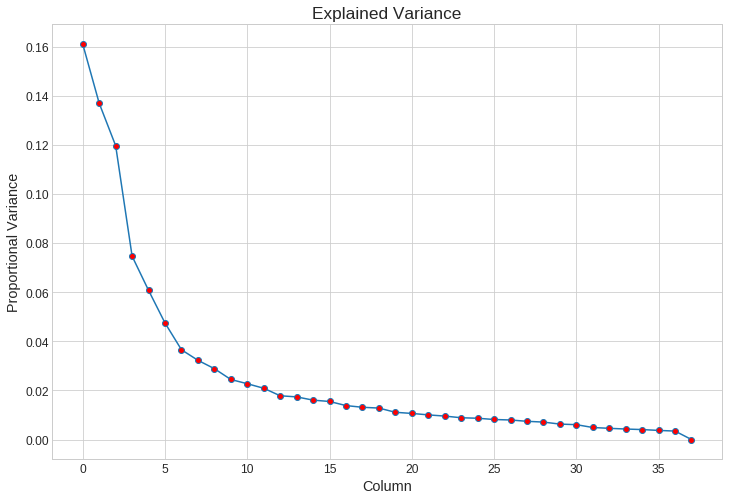

In [75]:
explained_variance = (s*s)/s.dot(s)

plt.figure(figsize=(12,8))
plt.title('Explained Variance',size='xx-large')
plt.xlabel('Column',size='x-large')
plt.xticks(size='large')
plt.ylabel('Proportional Variance',size='x-large')
plt.yticks(size='large')
plt.plot(explained_variance,marker='o',markerfacecolor='red')

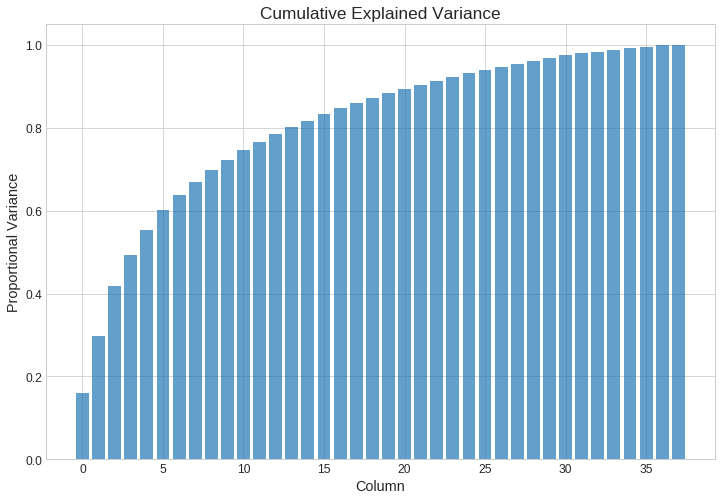

In [77]:
plt.figure(figsize=(12,8))
plt.title('Cumulative Explained Variance',size='xx-large')
plt.xlabel('Column',size='x-large')
plt.xticks(size='large')
plt.ylabel('Proportional Variance',size='x-large')
plt.yticks(size='large')
plt.bar(range(len(s)),explained_variance.cumsum(),alpha=.7)
plt.show()

In [ ]:
# Deixando a matriz com de fato n_col colunas

In [78]:
#Projeção com n_col da matriz 
n_col = 10
df_n_col = u.dot(diag_s[:,:n_col])
df_n_col.shape

(38, 10)

In [79]:
pd.DataFrame(df_n_col).head()

,0,1,2,3,4,5,6,7,8,9
0,-4120.321492,8435.742895,13944.166777,-25981.651362,10771.034405,-1460.792850,9498.853332,-5435.693758,2877.465449,-9758.533294
1,18628.359789,14407.823800,-16617.745275,-2038.229406,-10628.290282,-13437.809582,-1633.589711,-26398.952376,-11867.073996,2607.447955
2,-15823.873167,14048.426842,-47332.062728,-16064.219011,-22913.562415,-2754.981900,8519.093320,-9422.342527,11121.992147,-1121.856054
3,-11292.905025,4527.380259,9426.726478,-15440.938260,-1014.753543,-1197.696040,-9516.229146,8010.573874,3470.818421,-18020.599326
4,6317.945887,20260.768492,4576.834579,8993.495133,17438.376473,13422.225115,-10983.445819,2387.957548,4971.678932,-10707.422239


In [80]:
#Projeção com n_col da matriz 
df_n_col2 = X.dot(v_t[:n_col,:].T)
df_n_col2.shape

(38, 10)

In [81]:
pd.DataFrame(df_n_col2).head()

,0,1,2,3,4,5,6,7,8,9
0,-4120.321492,8435.742895,13944.166777,-25981.651362,10771.034405,-1460.792850,9498.853332,-5435.693758,2877.465449,-9758.533294
1,18628.359789,14407.823800,-16617.745275,-2038.229406,-10628.290282,-13437.809582,-1633.589711,-26398.952376,-11867.073996,2607.447955
2,-15823.873167,14048.426842,-47332.062728,-16064.219011,-22913.562415,-2754.981900,8519.093320,-9422.342527,11121.992147,-1121.856054
3,-11292.905025,4527.380259,9426.726478,-15440.938260,-1014.753543,-1197.696040,-9516.229146,8010.573874,3470.818421,-18020.599326
4,6317.945887,20260.768492,4576.834579,8993.495133,17438.376473,13422.225115,-10983.445819,2387.957548,4971.678932,-10707.422239


In [82]:
linalg.norm(df_n_col-df_n_col2)

4.5594783143549426e-10

# Comparando com Truncated-SVD do sklearn

In [83]:
t_svd = TruncatedSVD(n_components=n_col)
df_n_col_tsvd = t_svd.fit_transform(X)

In [84]:
pd.DataFrame(df_n_col_tsvd).head()

,0,1,2,3,4,5,6,7,8,9
0,-4120.323059,8435.750597,-13944.159199,-25981.691746,-10771.078845,1464.893147,9485.296810,5433.185798,2898.193681,-9772.858492
1,18628.359135,14407.827877,16617.759551,-2038.463741,10628.219389,13445.182464,-1658.663566,26334.658014,-11810.790178,2547.778053
2,-15823.874117,14048.423828,47332.039097,-16064.336730,22913.875844,2754.386233,8509.676230,9425.395206,11125.547696,-1190.568367
3,-11292.904897,4527.381216,-9426.723686,-15441.112491,1015.143268,1200.964945,-9528.508704,-8033.825930,3512.984887,-18064.996665
4,6317.946612,20260.771535,-4576.822810,8993.442757,-17437.997383,-13419.628608,-10992.801916,-2412.345811,5019.057696,-10687.169374
